### In this notebook I will implement Logistic Regression (for binary classification) with gradient descent from scratch. To do that, I will create a custom class

LogisticRegression. It will have the following variables (let’s denote the samples with m and the number of features with n):
<br>**X** a feature matrix of size m×n
<br>**y** a target vector of size m×1
<br>**w** a weight vector of size n×1 (that we can use to make predictions)
<br>**loss_history** an array that we can use to plot the loss history over iterations.

It will have the following functions:
<br>**init**: a constructor that has 2 parameters, learning_rate and iterations, which are set to 0.01 and 10,000 by default
<br>**sigmoid**: a function that computes the sigmoid function (maps real numbers into probabilities between 0 and 1)
<br>**yhat**: a function that computes sigmoid(X@w)
<br>**loss**: calculates the binary cross-entropy loss (log-loss) between predictions and actual values
<br>**gradient_descent**: updates weights using the gradient of the loss
<br>**fit**: fits the model on some training data (X and y)
<br>**predict**: makes predictions on some data (X_test

In [2]:
import numpy as np
class LogisticRegression():

    def __init__(self, learning_rate = 0.01, iterations = 10000):
        """
        Initializes a LogisticRegression model with the parameters learning_rate (set to 0.01 by default) and
        iterations set to 10,000 by default.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.loss_history = []

    def sigmoid(self, z):
        """
        z - ndarray of shape (m,1)
        computes the sigmoid function on a given array z using the formula
        1/(1+e^-z)
        A sigmoid is a function that maps real numbers to the interval (0,1)
        returns
        """
        
        z = np.clip(z, -500, 500)  
        return 1.0 / (1.0 + np.exp(-z))
    
    # X shape is (m*n) and w is (n*1)
    def yhat(self, X,w):
        """
        X - ndarray of shape (m,n) a features matrix
        w - ndarray of shape (n,1)

        returns:
        yhat - ndarray of shape (m,1) estimates for the target vector y using X and w.
        """
        return self.sigmoid(np.dot(X,w))
        
    def loss(self, y,yhat):
        """
        y - ndarray of shape (m,1)
        yhat - ndarray of shape (m,1)

        returns:
        float: the cross entropy loss (Log-loss)
        """
        # this is to remove values that are equal to log(0) (will result in inf)
        yhat = np.clip(yhat, 1e-15, 1 - 1e-15) 
        return -1/self.m * np.sum(y*np.log(yhat)+(1-y)*np.log(1-yhat))

    def gradient_descent(self, X,y,yhat,w):
        """
        X - ndarray of shape (m,n) a features matrix
        y - ndarray of shape (m,1) a target vector
        yhat - ndarray of shape (m,1) our estimates about y using X and w
        w - ndarray of shape (n,1) a weight vector

        returns:
        w - ndarray of hsape (n,1) an updated version of w using gradient descent.
        """
        grad = (1/self.m)* (X.T @(yhat-y)) 
        w =  w-self.learning_rate*grad
        return w

    def fit(self, X,y):
        """
        X - ndarray of shape (m,n) a features matrix
        y - ndarray of shape (m,1) a target vector

        fits and trains the model on the features matrix X and the target vector y.
        """
        self.loss_history=[] # to ensure we reset it each time we train the model.
        X = np.hstack([X, np.ones((X.shape[0], 1))]) # adding a bias column
        y = y.reshape(-1, 1)
        
        self.m = X.shape[0] # number of samples
        self.n = X.shape[1] # number of features

        w = np.zeros((self.n,1))
        for it in range(self.iterations):
            yhat = self.yhat(X,w)
            loss = self.loss(y,yhat)
            self.loss_history.append(loss)
            w = self.gradient_descent(X,y,yhat,w)

            if it % 1000 == 0:
                print(f'The error at iteration {it} is {loss:.4f}')

        self.w = w

    def predict(self, X,threshold=.5):
        """
        X - ndarray of shape (m,n): Features matrix
        threshold - float a threshold for converting probabilities to labels
        
        returns:
        ŷ - ndarray of shape (m,1) with values 0 or 1: a vector of our estimates for the values in y
        after the model has been fit.
        """
        X = np.hstack([X,np.ones((X.shape[0], 1))])
        probs = self.yhat(X,self.w)
        return (probs>=threshold).astype(int)
    
    def predict_probas(self,X):
        """
        X - ndarray of shape (m,n): Features matrix

        returns:
        ŷ - ndarray of shape (m,1) with values in the interval (0,1):
        a vector of our probability estimates for the values in y
        after the model has been fit.
        """
        X = np.hstack([X,np.ones((X.shape[0],1))])
        return self.yhat(X,self.w)
    
    def score(self, X, y,threshold = .5):
        """
        X - ndarray of shape (m,n) a features matrix
        y - ndarray of shape (m,1) a target vector
        threshold - float a threshold for converting probabilities to labels
        
        returns:
        float: Accuracy of the model (between 0 and 1) using correctly guessed/all guesses
        """
        y_pred = self.predict(X)
        return np.mean(y_pred.flatten() == y.flatten())

## Testing

In this part im going to test the model vs a logistic regression model from the scikit-learn library on the `breast-cancer` dataset.

Im going to test them, compare the scores, plot the loss_history over all of the iterations of the custom model and plot the guesses in both models.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLR

X, y = load_breast_cancer(return_X_y=True)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state = 42)
#First the custom model

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred_custom = model.predict(X_test)
accuracy_custom = model.score(X_test, y_test)
print("Accuracy of the custom model: ", accuracy_custom)

# The sklearn model

sk_model = SklearnLR(max_iter = 10000)
sk_model.fit(X_train,y_train)

y_pred_sk = sk_model.predict(X_test)
sk_model_accuracy = sk_model.score(X_test,y_test)
print("Sklearn accuracy: ", sk_model_accuracy)



The error at iteration 0 is 0.6931
The error at iteration 1000 is 3.8030
The error at iteration 2000 is 3.5750
The error at iteration 3000 is 3.6377
The error at iteration 4000 is 3.2997
The error at iteration 5000 is 3.4713
The error at iteration 6000 is 8.8336
The error at iteration 7000 is 3.1686
The error at iteration 8000 is 3.0777
The error at iteration 9000 is 2.8638
Accuracy of the custom model:  0.9473684210526315
Sklearn accuracy:  0.9766081871345029


# Plotting

Here are some plots:

**Plot 1**

Loss history `(Log-Loss)` over iterations. The curve shows that the loss decreases steadily with iterations, which indicates that the gradient descent is converging properly.

**Plot 2**

The results from the custom Logistic Regression Model

**Plot 3**

The results from the Scikit-Learn Logistic Regression Model

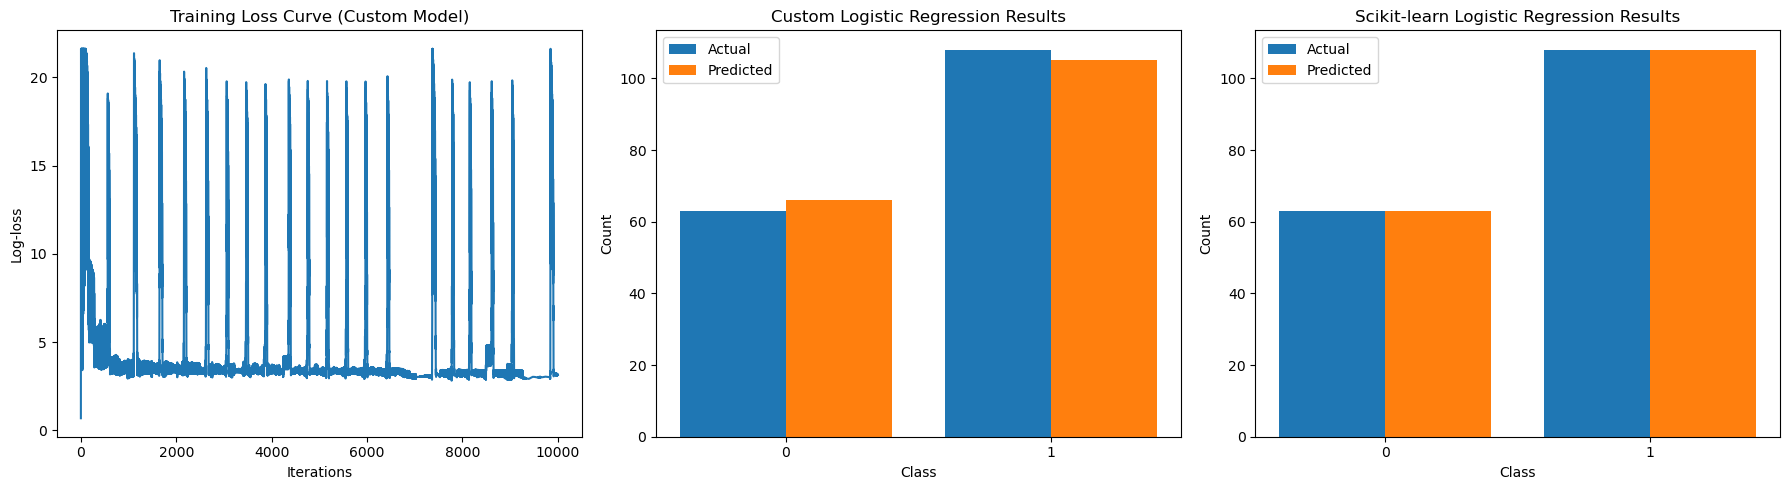

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Count how many 0s and 1s
actual_counts = np.bincount(y_test.flatten())
pred_custom_counts = np.bincount(y_pred_custom.flatten())
pred_sklearn_counts = np.bincount(y_pred_sk.flatten())

fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Plot 1: Loss history
axs[0].plot(model.loss_history)
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Log-loss")
axs[0].set_title("Training Loss Curve (Custom Model)")

# Plot 2: Custom model
x = np.arange(2)  # 0 and 1
axs[1].bar(x - 0.2, actual_counts, width=0.4, label="Actual")
axs[1].bar(x + 0.2, pred_custom_counts, width=0.4, label="Predicted")
axs[1].set_xticks([0, 1])
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count")
axs[1].set_title("Custom Logistic Regression Results")
axs[1].legend()

# Plot 3: Sklearn model
axs[2].bar(x - 0.2, actual_counts, width=0.4, label="Actual")
axs[2].bar(x + 0.2, pred_sklearn_counts, width=0.4, label="Predicted")
axs[2].set_xticks([0, 1])
axs[2].set_xlabel("Class")
axs[2].set_ylabel("Count")
axs[2].set_title("Scikit-learn Logistic Regression Results")
axs[2].legend()

plt.tight_layout()
plt.show()


## Conclusion

The custom model is performing really well compared to the scikit-learn one. The score of our model is ~0.947 and the scikit-learn one scores 0.976. The small difference in performance can be explained by the fact that scikit-learn’s model uses additional optimizations and regularization by default, while our implementation is a minimal gradient descent version without regularization. Still, the results show that the custom model successfully learns the decision boundary and produces predictions close to the professional library implementation. To further polish the custom model, we can add L1 and L2 regularization, implement early stopping, and experiment with the learning rate.